Plotting demo
============

Import stuff that we need later

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

A basic plotting example
------------------------

Define the plotting function

In [71]:
def make_plot(parent_mass, parent_intensity, fragment_masses, fragment_intensities):
    
    # define some colours
    parent_fontspec = {
        'size':'10', 
        'color':'blue', 
        'weight':'bold'
    }
    
    # make blank figure
    figsize=(10, 6)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    # plot the parent peak first
    plt.plot((parent_mass, parent_mass), (0, parent_intensity), linewidth=2.0, color='b')
    x = parent_mass
    y = parent_intensity
    label = "%.5f" % parent_mass
    plt.text(x, y, label, **parent_fontspec)

    # plot all the fragment peaks of this parent peak
    num_peaks = len(fragment_masses)
    for j in range(num_peaks):
        mass = fragment_masses[j]
        intensity = fragment_intensities[j]
        plt.plot((mass, mass), (0, intensity), linewidth=1.0, color='#FF9933')

    # set range of x- and y-axes
    xlim_upper = parent_mass + 50
    plt.xlim([0, xlim_upper])
    plt.ylim([0, 1.5])

    # show the axes info
    plt.xlabel('m/z')
    plt.ylabel('relative intensity')                    
    mz_value = ("%.5f" % parent_mass)
    rt_value = ("%.3f" % parent_rt)
    title = 'MS1 m/z=' + mz_value + ' RT=' + rt_value
    plt.title(title)

    # add legend
    blue_patch = mpatches.Patch(color='blue', label='Parent peak')
    yellow_patch = mpatches.Patch(color='#FF9933', label='Fragment peaks')
    plt.legend(handles=[blue_patch, yellow_patch])  
    
    return plt, ax

Call the plotting function

In [72]:
# some parent ms1 peak info
parent_mass = 160.2234
parent_rt = 300.0
parent_intensity = 0.25

# list of masses for the fragment peak
fragment_masses = [95.0123, 110.1222, 132.1442, 140.8217, 125.2325, 100]

# list of relative intensities of each fragment peak
# the relative intensity is obtained by dividing the absolute intensity with the largest in the spectrum
fragment_intensities = [0.07, 0.44, 0.63, 1.0, 0.56, 0.1]

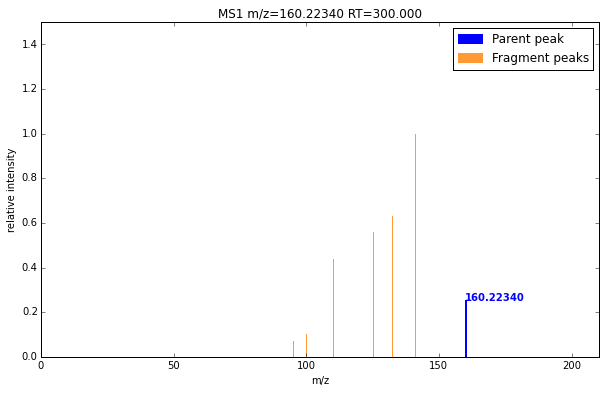

In [73]:
plt, ax = make_plot(parent_mass, parent_intensity, fragment_masses, fragment_intensities)
plt.show()

A slightly fancier plotting example
-----------------------------------

Define a method to return non-overlapping text positions in the plot. From http://stackoverflow.com/questions/8850142/matplotlib-overlapping-annotations

In [74]:
def get_text_positions(x_data, y_data, txt_width, txt_height):
    a = zip(y_data, x_data)
    text_positions = y_data.copy()
    for index, (y, x) in enumerate(a):
        local_text_positions = [i for i in a if i[0] > (y - txt_height) 
                            and (abs(i[1] - x) < txt_width * 2) and i != (y,x)]
        if local_text_positions:
            sorted_ltp = sorted(local_text_positions)
            if abs(sorted_ltp[0][0] - y) < txt_height: #True == collision
                differ = np.diff(sorted_ltp, axis=0)
                a[index] = (sorted_ltp[-1][0] + txt_height, a[index][1])
                text_positions[index] = sorted_ltp[-1][0] + txt_height
                for k, (j, m) in enumerate(differ):
                    #j is the vertical distance between words
                    if j > txt_height * 2: #if True then room to fit a word in
                        a[index] = (sorted_ltp[k][0] + txt_height, a[index][1])
                        text_positions[index] = sorted_ltp[k][0] + txt_height
                        break
    return text_positions

Define another method to take the plot returned by make_plot() and add some annotations to it

In [75]:
def add_labels(fragment_masses, fragment_intensities, labels):

    fragment_fontspec = {
        'size':'8', 
        'color':'#000000', 
        'weight':'bold'
    }  

    # turn the lists into Numpy arrays
    x_data = np.array(fragment_masses)
    y_data = np.array(fragment_intensities)    
    
    # set the bounding box for the text. Increase txt_width for wider text.
    txt_width = 0.05*(plt.xlim()[1] - plt.xlim()[0])
    txt_height = 0.2*(plt.ylim()[1] - plt.ylim()[0])

    text_positions = get_text_positions(x_data, y_data, txt_width, txt_height)
    for x, y, l, t in zip(x_data, y_data, labels, text_positions):
        if l is None:
            continue
        ax.text(x-txt_width, 1.01*t, l, rotation=0, **fragment_fontspec)
        if y != t:
            ax.arrow(x, t,0,y-t, color='black', alpha=0.2, width=txt_width*0.01, 
                       head_width=txt_width/4, head_length=txt_height*0.25, 
                       zorder=0,length_includes_head=True)


Call the plotting function

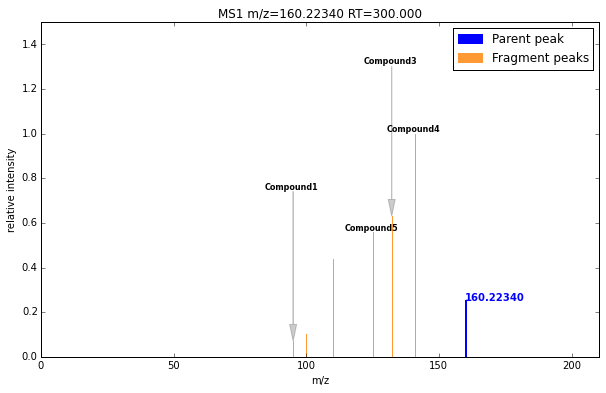

In [76]:
# make a pretty plot here
plt, ax = make_plot(parent_mass, parent_intensity, fragment_masses, fragment_intensities)
labels = ['Compound1', None, 'Compound3', 'Compound4', 'Compound5', None] # if none, then no annotation for that ms2 peak
add_labels(fragment_masses, fragment_intensities, labels)
plt.show()